In [1]:
from my_hmf import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cosmo_params = {
    "H0": 70,
    "Om0": 0.294,
    "Ob0": 0.022 / 0.7**2,
    "ns": 0.965,
    "As": 2e-9
}

### Test du changement de redshift

In [3]:
z = 1

In [3]:
mf1 = My_Tinker08(z=z, cosmo_params=cosmo_params)
mf2 = My_Tinker08(z=0, cosmo_params=cosmo_params)

mf2.set_z(z=z)

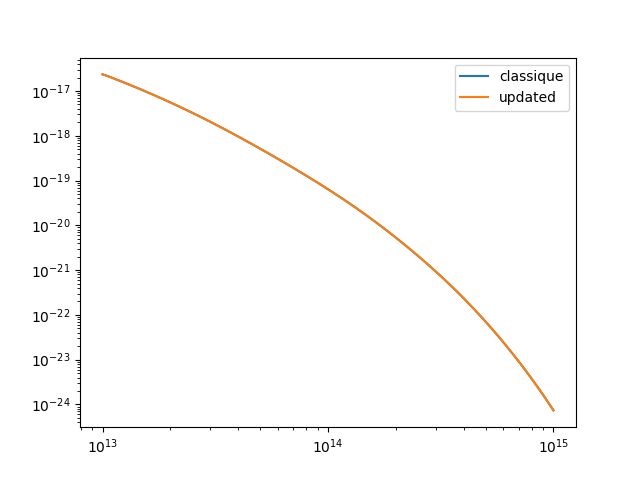

In [4]:
%matplotlib widget
## Test dndm
plt.figure()
plt.xscale("log")
plt.yscale("log")
plt.plot(mf1.m, mf1.dndm, label="classique")
plt.plot(mf2.m, mf2.dndm, label="updated")
plt.legend()
plt.show()

### Test du calcul du number count

In [3]:
N_z = 10
zmax = 1
Ncamb = 1000
resolution_z = 10


def cutting_function(z):
    return 10**14 * z


def p(m,z):
    return (m>cutting_function(z)).astype(int)

In [4]:
z, number_count = get_number_count(cosmo_params, N_z, zmax, Ncamb, resolution_z, p=p)
zth, number_countth = get_number_count(cosmo_params, N_z, zmax, Ncamb, resolution_z)

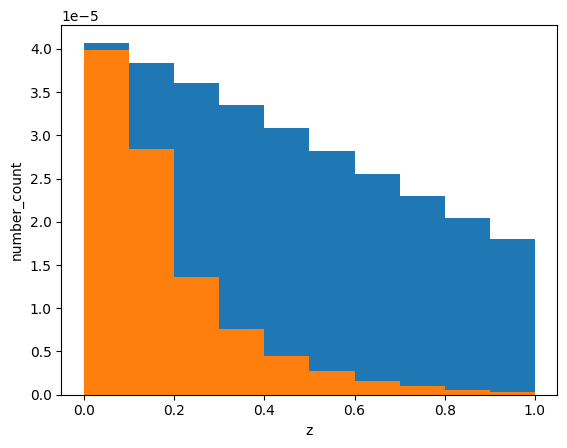

In [6]:
plt.figure()
# plt.xscale("log")
# plt.yscale("log")
plt.bar(z, number_countth, align = "edge", width = zmax/N_z)
plt.bar(z, number_count, align = "edge", width = zmax/N_z)
plt.xlabel("z")
plt.ylabel("number_count")
plt.show()

In [7]:
print(z)
print(number_count)

[0.  0.2 0.4 0.6 0.8]
[6.09129161e-05 2.32068122e-05 7.67600823e-06 2.77632449e-06
 9.58539371e-07]
